In [73]:
# Notebook setup
# Note these libraries are used by Sage's notebook Profile_Examples_for_WHOI.ipynb
import requests
import os
import re
import xarray as xr
!pip install netcdf4
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cmo
import ctd
import gsw
from ctd.read import _basename

# Make the Plots pretty
import seaborn as sns
sns.set()

# Supress open_mfdataset warnings
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'ctd'

In [10]:
# Provide URL to load a single file that has already been downloaded to OOI's OPENDAP server
# remember to use #fillmismatch
# Create directory that includes all urls
data_url = {}
data_url['inshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132326640Z-CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0003_CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191006T150003-20191031T212239.977728.nc#fillmismatch'
data_url['central_inshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132900316Z-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191007T210003-20191031T212442.986087.nc#fillmismatch'
data_url['central_offshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133142674Z-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191008T140003-20191031T212529.983845.nc#fillmismatch'
data_url['offshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133343088Z-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0012_CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191013T160003-20191031T211622.990750.nc#fillmismatch'

In [4]:
# Load the data file using xarray
#ds = xr.open_dataset(data_url)
#ds = ds.swap_dims({'obs': 'time'}) #Swap dimensions
#print('Dataset has %d points' % ds.time.size)

Dataset has 199587 points


In [11]:
# Load the data file using xarray
# This code is from Svenja Ryan in OOI_profiles_Svenja.ipynb
def load2xarray(location):
    """
    Load data at given location and reduce to variables of interest.
    """
    ds = xr.open_dataset(data_url[location])
    ds = ds.swap_dims({'obs': 'time'}) #Swap dimensions
    print('Dataset '+ location +' has %d points' % ds.time.size)
    ds = ds[['ctdpf_ckl_seawater_pressure','ctdpf_ckl_seawater_temperature','practical_salinity']]
    return ds

ds={}
for loc in list(data_url.keys()):
    ds[loc] = load2xarray(loc)

Dataset inshore has 158237 points
Dataset central_inshore has 210513 points
Dataset central_offshore has 236989 points
Dataset offshore has 199587 points


In [42]:
#Check out a profile
ds['offshore']

<xarray.Dataset>
Dimensions:                         (time: 199587)
Coordinates:
  * time                            (time) datetime64[ns] 2019-10-13T16:00:03 ... 2019-10-31T21:16:22.990750208
    lon                             (time) float64 ...
    lat                             (time) float64 ...
    pressure                        (time) float64 ...
    obs                             (time) int32 0 1 2 ... 199584 199585 199586
Data variables:
    ctdpf_ckl_seawater_pressure     (time) float64 20.06 20.02 ... 201.2 201.2
    ctdpf_ckl_seawater_temperature  (time) float64 ...
    practical_salinity              (time) float64 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:36:22.827367
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:36:22.827364
    id:                              CP04OSPM-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     71972c2a-379b-4d67-aa66-e0b52db477b5
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobservatories.org/
    license:                         
    contributor_name:                
    uuid:                            71972c2a-379b-4d67-aa66-e0b52db477b5
    creator_name:                    Ocean Observatories Initiative
    title:                           Data produced by Stream Engine version 1...
    sensor:                          03-CTDPFK000
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    acknowledgement:                 
    Conventions:                     CF-1.6
    project:                         Ocean Observatories Initiative
    source:                          CP04OSPM-WFP01-03-CTDPFK000-recovered_wf...
    publisher_url:                   http://oceanobservatories.org/
    creator_url:                     http://oceanobservatories.org/
    nodc_template_version:           NODC_NetCDF_TimeSeries_Orthogonal_Templa...
    subsite:                         CP04OSPM
    processing_level:                L2
    history:                         2020-08-06T13:36:22.827326 generated fro...
    time_coverage_start:             2019-10-13T16:00:03
    time_coverage_end:               2019-10-31T21:16:22.990750
    time_coverage_resolution:        P7.89S
    geospatial_lat_min:              39.935558
    geospatial_lat_max:              39.935558
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       0.1
    geospatial_lon_min:              -70.880328
    geospatial_lon_max:              -70.880328
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       0.1
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  0.1
    geospatial_vertical_positive:    down
    DODS.strlen:                     18
    DODS.dimName:                    string18
    DODS_EXTRA.Unlimited_Dimension:  obs

In [71]:
ds_off=ds['offshore']

In [72]:
pressure_off = ds_off.ctdpf_ckl_seawater_pressure
temp_off = ds_off.ctdpf_ckl_seawater_temperature
salinity_off = ds_off.practical_salinity

AttributeError: 'PolyCollection' object has no property 'c'

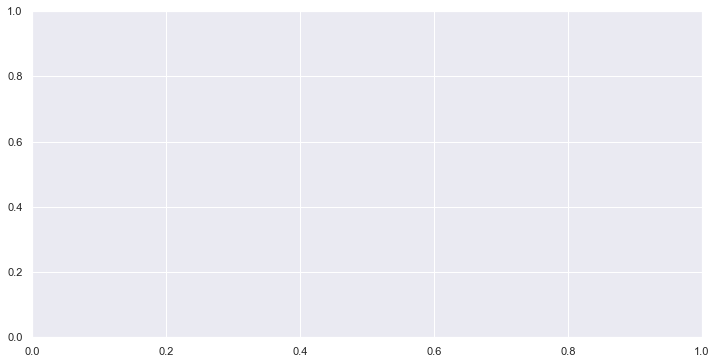

In [67]:
plt.figure(figsize=[12, 6])
plt.pcolor([ds['offshore'].time, pressure_off], c=temp_off)
#ds['offshore'].plot.scatter(x="time", y="pressure", c=temp_off)